   Unnamed: 0        date  n_sick   calls  n_duty  n_sby  sby_need  dafted
0           0  2016-04-01      73  8154.0    1700     90       4.0     0.0
1           1  2016-04-02      64  8526.0    1700     90      70.0     0.0
2           2  2016-04-03      68  8088.0    1700     90       0.0     0.0
3           3  2016-04-04      71  7044.0    1700     90       0.0     0.0
4           4  2016-04-05      63  7236.0    1700     90       0.0     0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   date        1152 non-null   object 
 2   n_sick      1152 non-null   int64  
 3   calls       1152 non-null   float64
 4   n_duty      1152 non-null   int64  
 5   n_sby       1152 non-null   int64  
 6   sby_need    1152 non-null   float64
 7   dafted      1152 non-null   float64
dtypes: float64(3), int64(4), obje

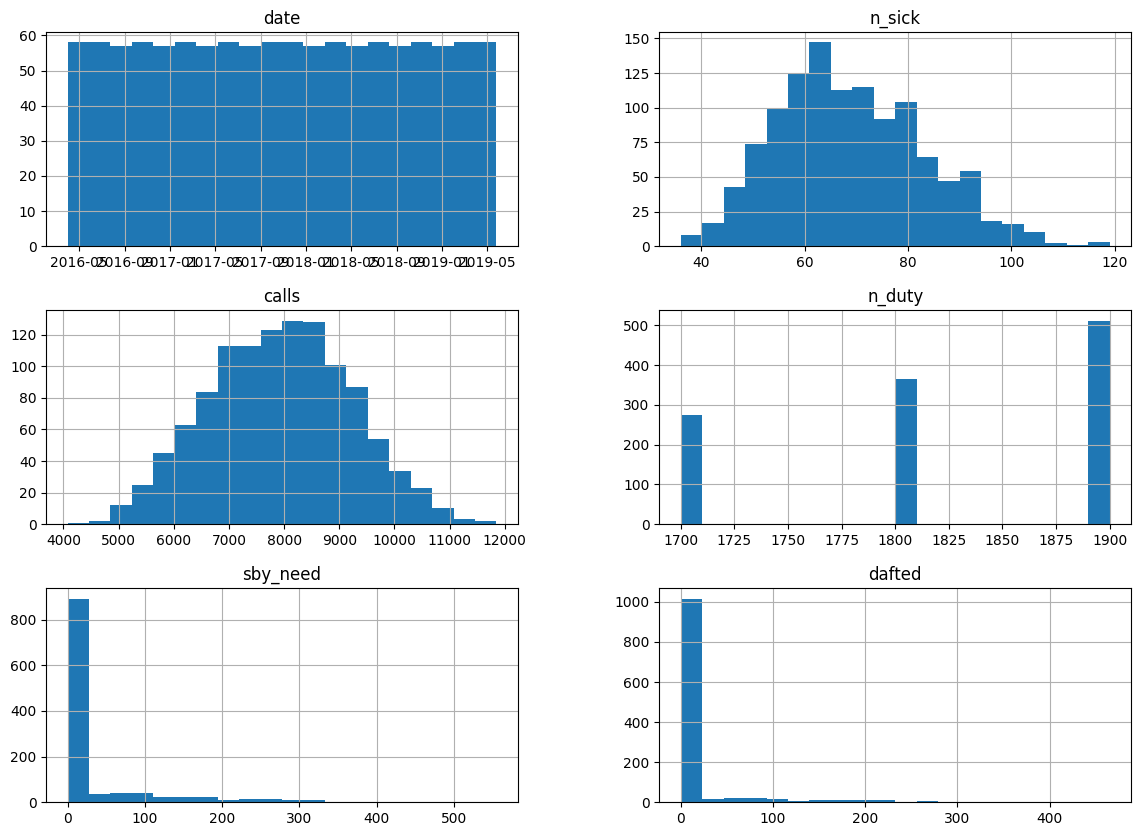

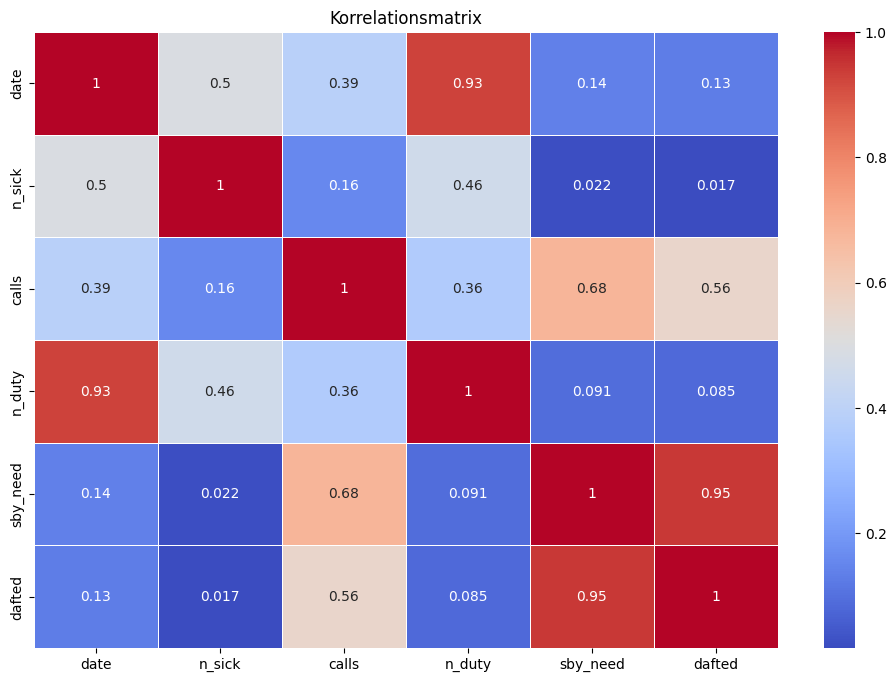

|          |     date |    n_sick |    calls |    n_duty |   sby_need |    dafted |
|:---------|---------:|----------:|---------:|----------:|-----------:|----------:|
| date     | 1        | 0.495959  | 0.385679 | 0.927437  |  0.137543  | 0.131938  |
| n_sick   | 0.495959 | 1         | 0.155371 | 0.459501  |  0.0223214 | 0.0168002 |
| calls    | 0.385679 | 0.155371  | 1        | 0.364135  |  0.677468  | 0.55734   |
| n_duty   | 0.927437 | 0.459501  | 0.364135 | 1         |  0.0906542 | 0.0849551 |
| sby_need | 0.137543 | 0.0223214 | 0.677468 | 0.0906542 |  1         | 0.945168  |
| dafted   | 0.131938 | 0.0168002 | 0.55734  | 0.0849551 |  0.945168  | 1         | 



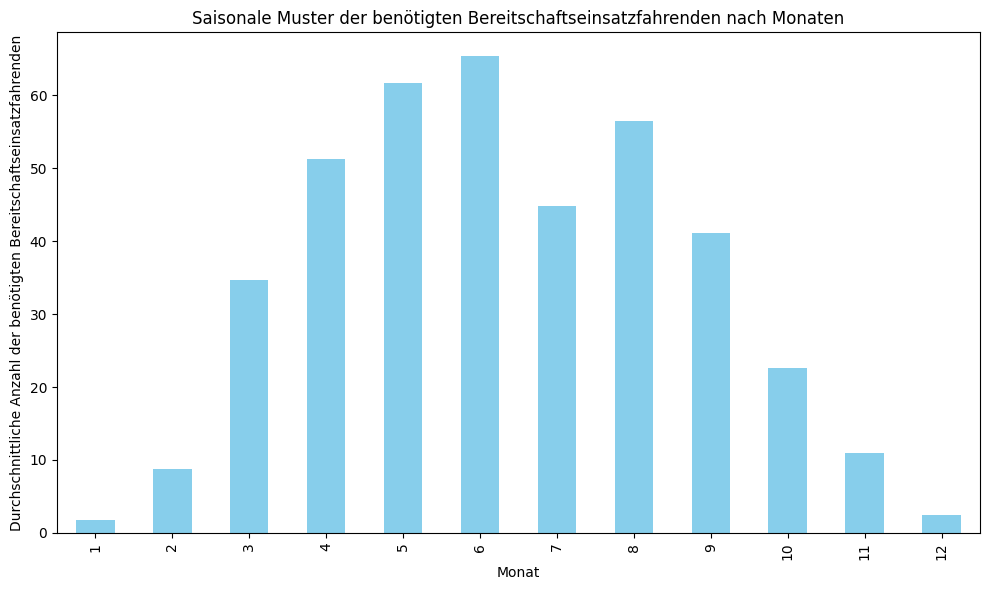

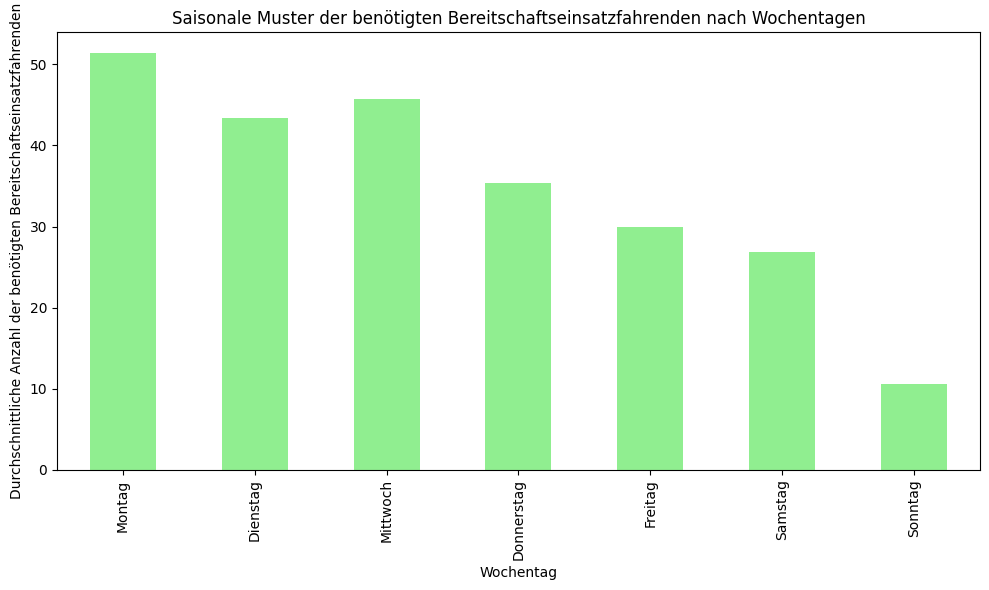

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten einlesen
data = pd.read_csv(r"C:\Users\Gast\Documents\Downloads\IU\Fallstudie_Modell_Engineering\sickness_table.csv")

# Erste fünf Zeilen der Daten anzeigen
print(data.head())

# Grundlegende Informationen zu den Daten anzeigen (Anzahl der Spalten und Zeilen sowie Datentyp)
print(data.info(), '\n')

# Statistische Zusammenfassung der Daten anzeigen (count, min, max, std, 25%, 50%, 75%)
print(data.describe(), '\n')

# Anzahl fehlender Werte in jeder Spalte anzeigen
print(data.isnull().sum(), '\n')

# Datum in Datumsformat konvertieren und setze sie als Index
data['date'] = pd.to_datetime(data['date'])
#data.set_index('date', inplace=True)

# Unnötige Spalte entfernen
data = data.drop(columns=['Unnamed: 0', 'n_sby'])

# Histogramme für numerische Variablen anzeigen
data.hist(bins=20, figsize=(14, 10))
plt.show()

# Korrelationen zwischen Variablen berechnen und anzeigen
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

# Korrelationsmatrix als Tabelle darstellen
print(correlation_matrix.to_markdown(), '\n')

###### Saisonale Muster ######
# Durchschnittliche Anzahl der benötigten Bereitschaftseinsatzfahrenden nach Monaten berechnen
monthly_data = data.groupby(data['date'].dt.month)['sby_need'].mean()

# Visualisierung
plt.figure(figsize=(10, 6))
monthly_data.plot(kind='bar', color='skyblue')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Anzahl der benötigten Bereitschaftseinsatzfahrenden')
plt.title('Saisonale Muster der benötigten Bereitschaftseinsatzfahrenden nach Monaten')
plt.tight_layout()
plt.show()

# Durchschnittliche Anzahl der benötigten Bereitschaftseinsatzfahrenden nach Wochentagen berechnen
weekly_data = data.groupby(data['date'].dt.dayofweek)['sby_need'].mean()

# Visualisierung
plt.figure(figsize=(10, 6))
weekly_data.plot(kind='bar', color='lightgreen')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittliche Anzahl der benötigten Bereitschaftseinsatzfahrenden')
plt.title('Saisonale Muster der benötigten Bereitschaftseinsatzfahrenden nach Wochentagen')
plt.xticks(ticks=range(7), labels=['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag'])
plt.tight_layout()
plt.show()
############################

######
# Boxplots zur Identifikation von Ausreißern anzeigen
#data.boxplot(figsize=(14, 10))
#plt.xticks(rotation=90)
#plt.show()

# Verteilung der Zielvariable anzeigen
#plt.figure(figsize=(10, 6))
#sns.histplot(data['sby_need'], kde=True)
#plt.xlabel('Anzahl benötigter Bereitschaftseinsatzfahrender')
#plt.title('Verteilung der Zielvariable')
#plt.show()

# Scatterplot-Matrix zur Untersuchung der Beziehungen zwischen Variablen anzeigen
#sns.pairplot(data)
#plt.show()


